# TP1 Apprentissage

In [21]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNNs
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import time

## 1. Dataset Exploration & Visualization

### Load MNIST dataset

In [2]:
# Load data
mnist = fetch_openml('mnist_784') 

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
print("Shape of data : ", mnist.data.shape)
print("Shape of target : ",mnist.target.shape)

Shape of data :  (70000, 784)
Shape of target :  (70000,)


In [5]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Visualize dataset

Target =  5
Data in shape of (28,28) : 
 [[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
    18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
   2

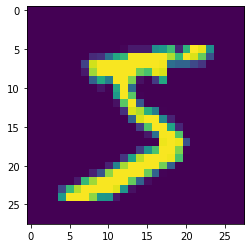

In [13]:
print("Target = ", mnist.target[0])
print("Data in shape of (28,28) : \n",mnist.data[0].reshape(1,28,28))
plt.imshow(mnist.data[0].reshape(28,28))
plt.show()

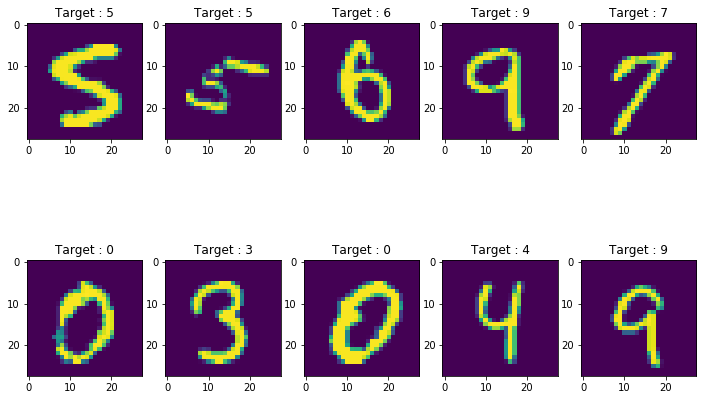

In [6]:
plt.figure(figsize=(12,8))
for i in range(10):
    idx = np.random.randint(len(mnist.data))
    plt.subplot(2,5,i+1)
    plt.imshow(mnist.data[idx].reshape(28,28))
    plt.title("Target : {}".format(mnist.target[idx]))
plt.show()

## 2. K-Nearest Neighbors method (K-NN)

### Shuffle data and take a small batch of 5000 samples

In [14]:
# shuffle & print shape 
# data is not normalize
indexes = random.sample(range(70000),5000)
images = mnist.data[indexes].reshape((-1,28,28))
data = mnist.data[indexes]
labels = mnist.target[indexes]
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training images :  (5000, 28, 28)
Shape of training data :  (5000, 784)
Shape of label :  (5000,)


### Split data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Training data shape : ", X_train.shape)
print("Training target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Training data shape :  (4000, 784)
Training target shape :  (4000,)
Testing data shape :  (1000, 784)
Testing target shape :  (1000,)


### Train k-NN classifier with k = 10

In [34]:
%%time
n_neighbors = 10
clf = KNNs(n_neighbors)
clf.fit(X_train,y_train)

CPU times: user 195 ms, sys: 3.96 ms, total: 199 ms
Wall time: 195 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Plot predictions...

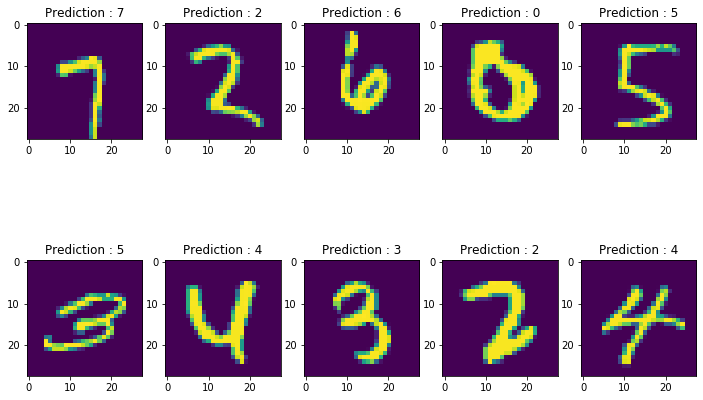

CPU times: user 2.27 s, sys: 7.98 ms, total: 2.27 s
Wall time: 2.27 s


In [19]:
%%time
plt.figure(figsize=(12,8))
for i in range(10):
    idx = np.random.randint(len(X_test))
    y_pred = clf.predict([X_test[idx]])
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title("Prediction : {}".format(y_pred[0]))
plt.show()

### Compute manually score

In [28]:
def get_score(y_true,y_pred):
    """
    This function computes the correct prediction / total prediction 
    """
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    print("Nb of true prediction : {}/{}".format(correct,len(y_true)))
    return correct / len(y_true)

In [29]:
y_pred = clf.predict(X_test)
score  = get_score(y_test,y_pred)
print("Score = ",score)

Nb of true prediction : 928/1000
Score =  0.928


### Verify again with clf.score...

In [27]:
clf.score(X_test,y_test)

0.928

### Classification report 

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        97
           1       0.83      0.98      0.90       121
           2       1.00      0.89      0.94        90
           3       0.91      0.95      0.93       116
           4       0.92      0.89      0.91        97
           5       0.96      0.90      0.93        82
           6       0.98      0.98      0.98       105
           7       0.92      0.92      0.92       104
           8       1.00      0.85      0.92        98
           9       0.86      0.91      0.89        90

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



### Confusion matrix

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function plots the confusion matrix of classfier
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


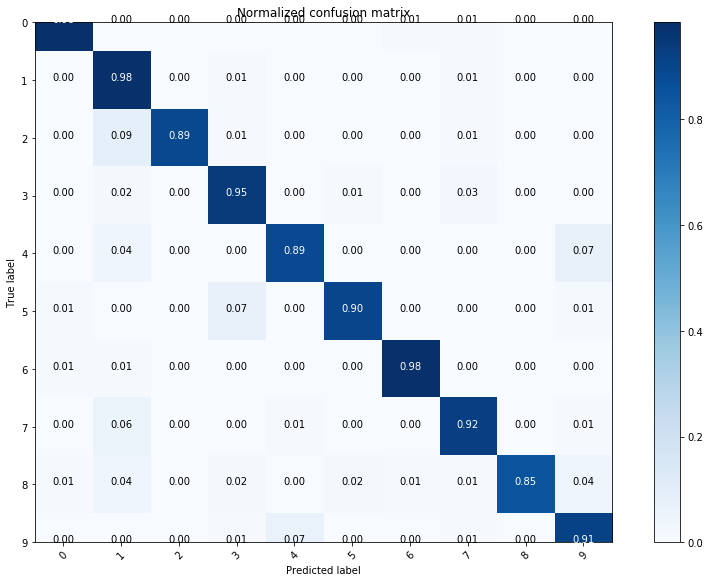

In [32]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 3. Parameter tuning for k-NN

### 3.1. Number of voisins

In [38]:
scores = []
for n_neighbors in range(2,16):
    print("==== Case n_neighbors : {} =====".format(n_neighbors))
    clf = KNNs(n_neighbors)
    print("Fitting model...")
    clf.fit(X_train,y_train)
    print("Predicting...")
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)

==== Case n_neighbors : 2 =====
Fitting model...
Predicting...
Nb of true prediction : 917/1000
==== Case n_neighbors : 3 =====
Fitting model...
Predicting...
Nb of true prediction : 922/1000
==== Case n_neighbors : 4 =====
Fitting model...
Predicting...
Nb of true prediction : 920/1000
==== Case n_neighbors : 5 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 6 =====
Fitting model...
Predicting...
Nb of true prediction : 927/1000
==== Case n_neighbors : 7 =====
Fitting model...
Predicting...
Nb of true prediction : 922/1000
==== Case n_neighbors : 8 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 9 =====
Fitting model...
Predicting...
Nb of true prediction : 925/1000
==== Case n_neighbors : 10 =====
Fitting model...
Predicting...
Nb of true prediction : 920/1000
==== Case n_neighbors : 11 =====
Fitting model...
Predicting...
Nb of true prediction : 923/1000
==== Case n_neighbors : 12 =====
Fitti

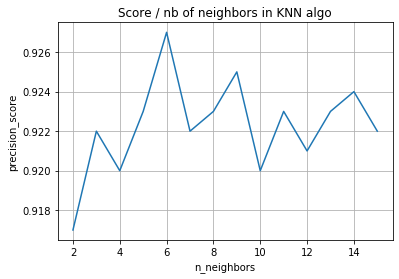

In [44]:
fig, ax = plt.subplots()
n_neighbors = np.arange(2,16,1)
ax.plot(n_neighbors, np.array(scores))

ax.set(xlabel='n_neighbors', ylabel='precision_score',
       title='Score / nb of neighbors in KNN algo')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

#### 2.K-Fold


In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [0]:
# id_fold = 1
# for train_index, test_index in kf.split(data):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     print("==========Fold num {}============".format(id_fold))
#     id_fold += 1
#     X_train, X_test = data[train_index], data[test_index]
#     y_train, y_test = labels[train_index], labels[test_index]
#     clf = KNNs(n_neighbors)
#     print("Fitting model...")
#     clf.fit(X_train,y_train)
#     print("Predicting...")
#     y_pred = clf.predict(X_test)
#     correct = 0
#     for i in range(len(y_test)):
#         if y_test[i] == y_pred[i]:
#             correct += 1
#     print("Nb of true prediction : {}/{}".format(correct,len(y_test)))    

In [53]:
id_fold = 0
scores = np.zeros((10,14))
for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
    print("==========Fold num {}============".format(id_fold))
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    for n_neighbors in range(2,16):
        print("      ==== Case n_neighbors : {} =====".format(n_neighbors))
        clf = KNNs(n_neighbors)
        print("      Fitting model...")
        clf.fit(X_train,y_train)
        print("      Predicting...")
        y_pred = clf.predict(X_test)
        score = get_score(y_test,y_pred)
        scores[id_fold,n_neighbors-2] = score
        
    id_fold += 1
    print("================= Fin ======================\n")

==========Fold num 0============
      ==== Case n_neighbors : 2 =====
      Fitting model...
      Predicting...
Nb of true prediction : 463/500
      ==== Case n_neighbors : 3 =====
      Fitting model...
      Predicting...
Nb of true prediction : 468/500
      ==== Case n_neighbors : 4 =====
      Fitting model...
      Predicting...
Nb of true prediction : 468/500
      ==== Case n_neighbors : 5 =====
      Fitting model...
      Predicting...
Nb of true prediction : 461/500
      ==== Case n_neighbors : 6 =====
      Fitting model...
      Predicting...
Nb of true prediction : 466/500
      ==== Case n_neighbors : 7 =====
      Fitting model...
      Predicting...
Nb of true prediction : 462/500
      ==== Case n_neighbors : 8 =====
      Fitting model...
      Predicting...
Nb of true prediction : 461/500
      ==== Case n_neighbors : 9 =====
      Fitting model...
      Predicting...
Nb of true prediction : 460/500
      ==== Case n_neighbors : 10 =====
      Fitting model...
 

In [56]:
scores.shape

(10, 14)

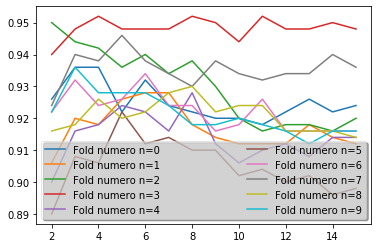

In [61]:
fig, ax = plt.subplots()
n_neighbors = np.arange(2,16,1)
for n in range(10):
    plt.plot(n_neighbors, scores[n,:], label="Fold numero n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

#### 3.Pourcentage des échantillons

In [64]:
def get_rate(x):
    return 0.5 + int(x) * 0.05
for i in range(10):
    print(get_rate(i))

0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.8500000000000001
0.9
0.95


In [65]:
scores = []
for i in range(10):
    split_rate =  get_rate(i)
    print("===== Case split_rate = {}  =======".format(split_rate))
    X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =split_rate)
    print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
    print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
    n_neighbors = 10
    clf = KNNs(n_neighbors)
    print("Fitting model...")
    clf.fit(X_train,y_train)
    print("Predicting...")
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)
    print("=====================================\n")

===== Case split_rate = 0.5  =======
Traning data shape :  (2500, 784) Traning target shape :  (2500,)
Testing data shape :  (2500, 784) Testing target shape :  (2500,)
Fitting model...
Predicting...
Nb of true prediction : 2281/2500

===== Case split_rate = 0.55  =======
Traning data shape :  (2750, 784) Traning target shape :  (2750,)
Testing data shape :  (2250, 784) Testing target shape :  (2250,)
Fitting model...
Predicting...
Nb of true prediction : 2060/2250

===== Case split_rate = 0.6  =======
Traning data shape :  (3000, 784) Traning target shape :  (3000,)
Testing data shape :  (2000, 784) Testing target shape :  (2000,)
Fitting model...
Predicting...
Nb of true prediction : 1805/2000

===== Case split_rate = 0.65  =======
Traning data shape :  (3250, 784) Traning target shape :  (3250,)
Testing data shape :  (1750, 784) Testing target shape :  (1750,)
Fitting model...
Predicting...
Nb of true prediction : 1607/1750

===== Case split_rate = 0.7  =======
Traning data shape : 

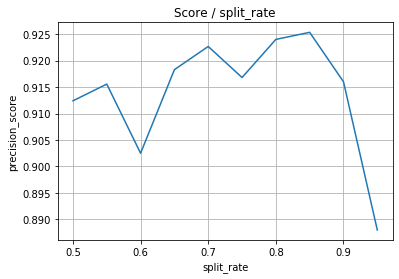

In [67]:
fig, ax = plt.subplots()
split_rate = [get_rate(i) for i in range(10)] 
ax.plot(np.array(split_rate), np.array(scores))

ax.set(xlabel='split_rate', ylabel='precision_score',
       title='Score / split_rate')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
scores = []
for p in range(1,10):
    clf = KNNs(n_neighbors=10,p=p,metric='minkowski')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = get_score(y_test,y_pred)
    scores.append(score)

Nb of true prediction : 887/1000
Nb of true prediction : 912/1000
Nb of true prediction : 922/1000
Nb of true prediction : 924/1000
Nb of true prediction : 926/1000
Nb of true prediction : 929/1000
Nb of true prediction : 929/1000
Nb of true prediction : 931/1000
Nb of true prediction : 931/1000


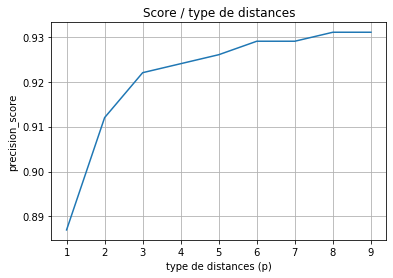

In [70]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10,1), np.array(scores))

ax.set(xlabel='type de distances (p)', ylabel='precision_score',
       title='Score / type de distances')
ax.grid()
# fig.savefig("score-per-neighbors.png")
plt.show()

#### 4.Tester n_jobs in KNN algo

In [73]:
## Case n_jobs = 1
import time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = 1)
start = time.time()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.time()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.time()
print("Predicting time: ",end_pred-end_train)
score = get_score(y_test,y_pred)
print("Score : ",score)
print("Total execution time : ",time.time()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.11102581024169922
Predicting...
Predicting time:  6.197011947631836
Nb of true prediction : 925/1000
Score :  0.925
Total execution time :  6.309671401977539


In [74]:
## Case n_jobs = -1
import time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = -1)
start = time.time()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.time()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.time()
print("Predicting time: ",end_pred-end_train)
score = get_score(y_test,y_pred)
print("Score : ",score)
print("Total execution time : ",time.time()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.11366963386535645
Predicting...
Predicting time:  4.9464216232299805
Nb of true prediction : 920/1000
Score :  0.92
Total execution time :  5.06197714805603


-----

